In [1]:
# import libraries (https://www.kaggle.com/basu369victor/generate-music-with-variational-autoencoder)
import librosa

import numpy as np
import pandas as pd
import os

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers 

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
import imageio
import time
import IPython.display as ipd

import music21

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
seed=123
tf.compat.v1.set_random_seed(seed)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
def DatasetLoader():
    music_list = np.array(sorted(os.listdir('./data/')))
    train_music_1 = list(music_list[[0]])
    # train_music_1 = list(music_list[[0,52,19,39,71,12,75,85,3,45,24,46,88]]) #99,10,66,76,41
    # train_music_2 = list(music_list[[4,43,56,55,45,31,11,13,70,37,21,78]]) #65,32,53,22,19,80,89,
    TrackSet_1 = ['./data/'+'%s'%(x) for x in train_music_1]
    # TrackSet_2 = [(BASE_PATH)+'/'+class_+'/%s'%(x) for x in train_music_2]

    # return TrackSet_1, TrackSet_2
    return TrackSet_1

In [4]:
def load(file_):
    data_, sampling_rate = librosa.load(file_,sr=3000, offset=0.0, duration=30)
    data_ = data_.reshape(1,90001)
    return data_
map_data = lambda filename: tf.compat.v1.py_func(load, [filename], [tf.float32])

In [5]:
# TrackSet_1, TrackSet_2 = DatasetLoader('jazz')
TrackSet_1 = DatasetLoader()

In [15]:
sample = TrackSet_1[0]
sample_, sampling_rate = librosa.load(sample, sr=3000, offset=0.0, duration=30)
ipd.display(ipd.Audio(sample_, rate=44000))

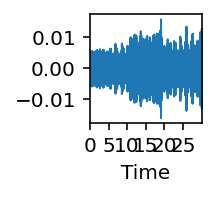

In [11]:
import librosa.display
plt.figure(figsize=(1,1))
librosa.display.waveplot(sample_, sr=3000)

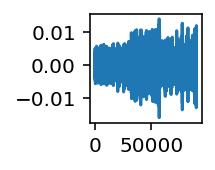

In [12]:
plt.figure(figsize=(1,1))
plt.plot(sample_)